# Steel Plate Defect Prediction

This is a KAGGLE Competition on predicting the probability of various defects on steel plates.

There are 7 binary targets: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults. The objective is to predict the probability of each of the 7 binary targets of the test set. 

The data is already split in Train and Test sets.

The competition URL: https://www.kaggle.com/competitions/playground-series-s4e3/overview

https://www.kaggle.com/code/kidkoala/super-simple-defect-prediction-with-3-models

## Importing Libraries

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Reading the data

In [2]:
# Setting the pandas condition to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Locating the zip file
file = zipfile.ZipFile('..\Data\playground-series-s4e3.zip')

# Printing the filelist
for i in file.filelist:
    print(i.filename)

sample_submission.csv
test.csv
train.csv


In [4]:
# Openning the zip file and reading the provided csv file from KAGGLE

with file.open('train.csv') as t:
    df_train = pd.read_csv(t)
    
    
with file.open('test.csv') as te:
    df_test = pd.read_csv(te)

## Exploring the df

In [5]:
print('The train df contains {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))

print('The test df contains {} rows and {} columns'.format(df_test.shape[0], df_test.shape[1]))

The train df contains 19219 rows and 35 columns
The test df contains 12814 rows and 28 columns


In [6]:
# Showing some columns of the df
df_train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [7]:
targets = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

In [8]:
# Checking whether we have targets without faults or with more than one fault
df_train[targets].sum(axis=1).value_counts()

1    18380
0      818
2       21
dtype: int64

From above, we can understand that we have cases without any defect (818 cases) and cases than have more than one defect (21 Cases). <br>
Because we do not want predict whether the SteelPlate has defect or not, but we want to predict the type of the defect, we will remove the 818 cases without defect. <br>
For the cases that have more than one defect, we will analyze them to check whether we should take any action.

In [11]:
# Removing cases with no fault
df_train = df_train[df_train[targets].sum(axis=1) > 0]

In [29]:
# Filter rows where the sum of targets is greater than 1
multiple_targets_rows = df_train[targets].sum(axis=1) > 1

# Set other target columns to 0 for rows with multiple targets
df_train.loc[multiple_targets_rows, targets[:]] = 0

# Set "K_Scatch" to 1 for rows with multiple targets
df_train.loc[multiple_targets_rows, "K_Scatch"] = 1

In [32]:
df_train[targets].sum(axis=1).value_counts()

1    18401
dtype: int64

In [33]:
# Concatening train df and the test df in one

total_df = pd.concat([df_train, df_test])

In [34]:
# Checking the null values of the df

total_df.isnull().sum()

id                           0
X_Minimum                    0
X_Maximum                    0
Y_Minimum                    0
Y_Maximum                    0
Pixels_Areas                 0
X_Perimeter                  0
Y_Perimeter                  0
Sum_of_Luminosity            0
Minimum_of_Luminosity        0
Maximum_of_Luminosity        0
Length_of_Conveyer           0
TypeOfSteel_A300             0
TypeOfSteel_A400             0
Steel_Plate_Thickness        0
Edges_Index                  0
Empty_Index                  0
Square_Index                 0
Outside_X_Index              0
Edges_X_Index                0
Edges_Y_Index                0
Outside_Global_Index         0
LogOfAreas                   0
Log_X_Index                  0
Log_Y_Index                  0
Orientation_Index            0
Luminosity_Index             0
SigmoidOfAreas               0
Pastry                   12814
Z_Scratch                12814
K_Scatch                 12814
Stains                   12814
Dirtines

We do not have null values in this df. We have null values only on the targeted labeles, with the exact number as the test df length (Soo, in test df these labeles are not present).

There are no null values in the train and the test df

In [35]:
# Descriptive Analysis of the train df

total_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,31215.000000,31215.000000,31215.000000,3.121500e+04,3.121500e+04,31215.000000,31215.000000,31215.000000,3.121500e+04,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,31215.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000
mean,16184.768637,708.190165,752.525677,1.854290e+06,1.850125e+06,1698.853019,96.685247,64.708794,1.941326e+05,84.479609,128.606792,1459.892007,0.404934,0.594073,75.791286,0.352177,0.408512,0.575053,0.030935,0.616627,0.832003,0.588009,2.476561,1.314108,1.390051,0.100283,-0.139447,0.572199,0.079615,0.062497,0.186512,0.030868,0.026357,0.258736,0.355415
std,9263.945473,532.447505,500.594578,1.911864e+06,1.904240e+06,3750.566565,196.998473,143.845935,4.609339e+05,28.735434,14.115994,145.893711,0.490887,0.491078,53.312520,0.318855,0.124000,0.258672,0.048201,0.221140,0.221335,0.482747,0.764101,0.470280,0.404021,0.487294,0.118440,0.332374,0.270704,0.242062,0.389530,0.172964,0.160200,0.437952,0.478652
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,2.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.066700,0.000000,0.778200,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8157.500000,46.000000,214.000000,6.574680e+05,6.531950e+05,90.000000,15.000000,14.000000,9.948000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.316700,0.375800,0.006600,0.454500,0.655700,0.000000,1.954200,1.000000,1.079200,-0.272700,-0.192600,0.257000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16294.000000,775.000000,793.000000,1.398598e+06,1.398179e+06,169.000000,25.000000,24.000000,1.832700e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413000,0.545400,0.009500,0.636400,0.965500,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143500,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24228.500000,1152.000000,1165.500000,2.368336e+06,2.368203e+06,657.000000,65.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.653450,0.493700,0.818200,0.019100,0.785700,1.000000,1.000000,2.817600,1.431400,1.707600,0.526300,-0.084400,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,32032.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.747200,1.000000,1.000000,1.000000,4.680200,2.997300,4.258700,0.991700,0.591700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Checking if we have duplicated values

total_df.duplicated().sum()

0

There are no duplicate values on the df

# EDA (Exploratory Data Analysis)

In [37]:
sns.set_style('darkgrid')

In [38]:
# defineing the targeted columns:

targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

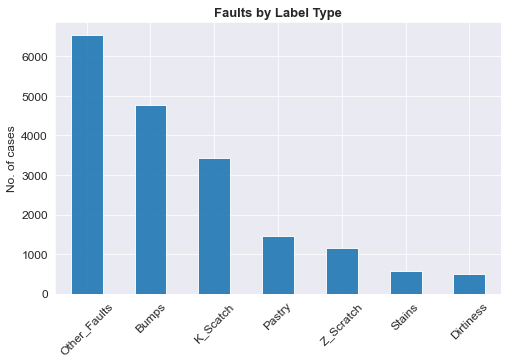

In [39]:
# Plotting Faults by the label type

faults_by_type = df_train[targets].sum().sort_values(ascending = False)

faults_by_type.plot(kind='bar', alpha = 0.9, figsize=(8,5))
plt.title('Faults by Label Type', fontsize = 13, fontweight = 'bold')
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel('No. of cases', fontsize=12)

plt.show()

From the above chart we can observe that the majority of the cases are "Other_Faults", followed by "Bumps" and "K_Scatch"

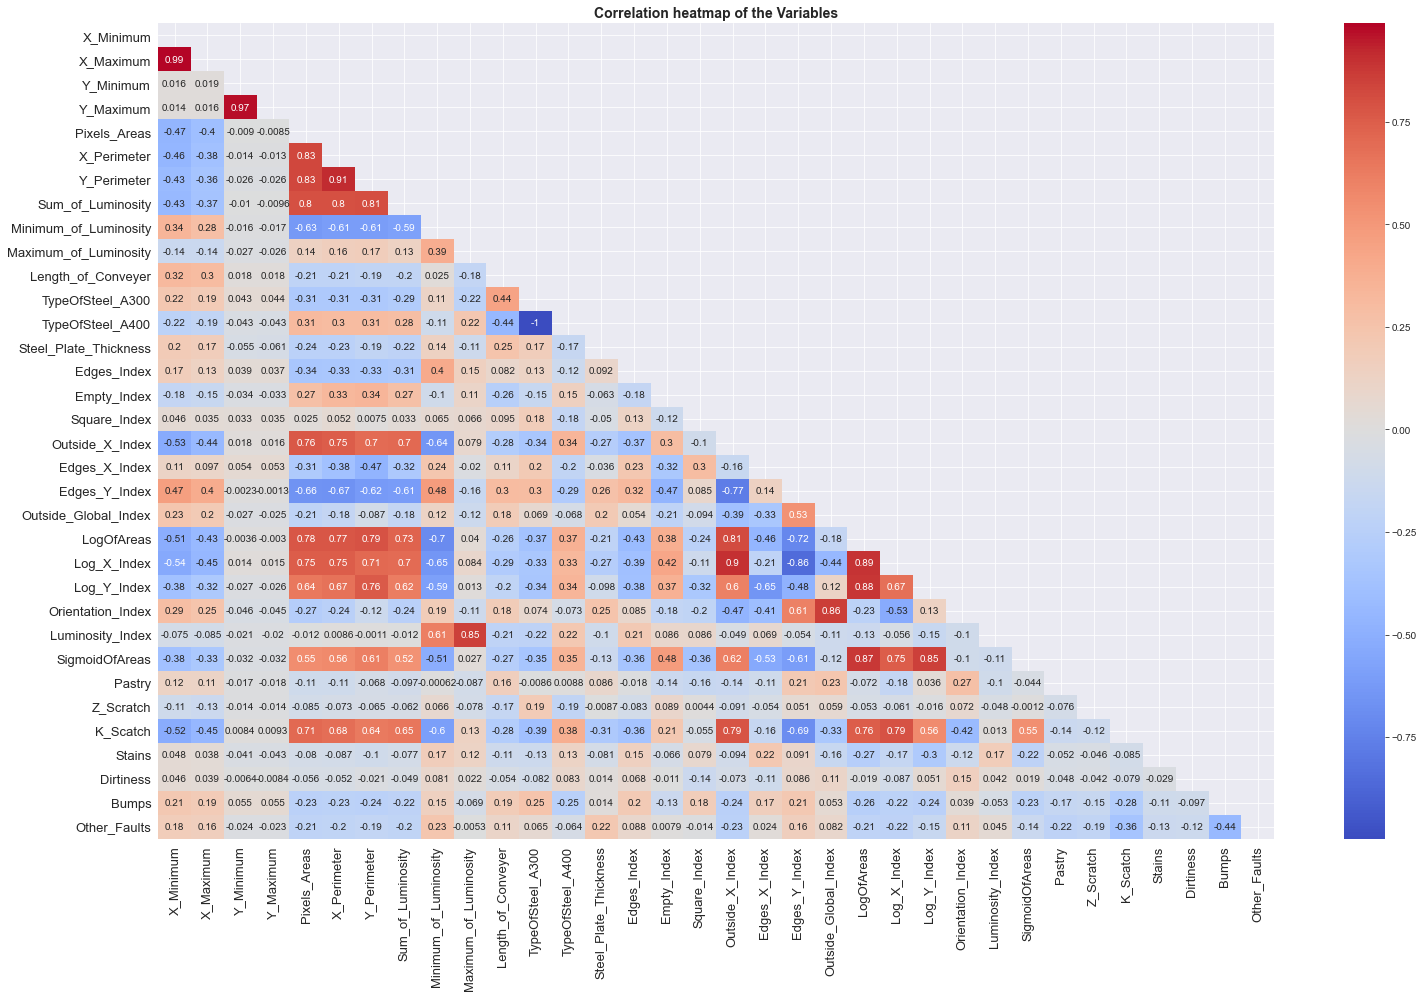

In [40]:
# Plotting the heatmap of correlations between features

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data=df_train.drop('id',axis=1).corr(), 
        annot=True, 
        mask = np.triu(np.ones_like(df_train.drop('id',axis=1).corr(), dtype=bool)),
           cmap='coolwarm')

plt.title('Correlation heatmap of the Variables', fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

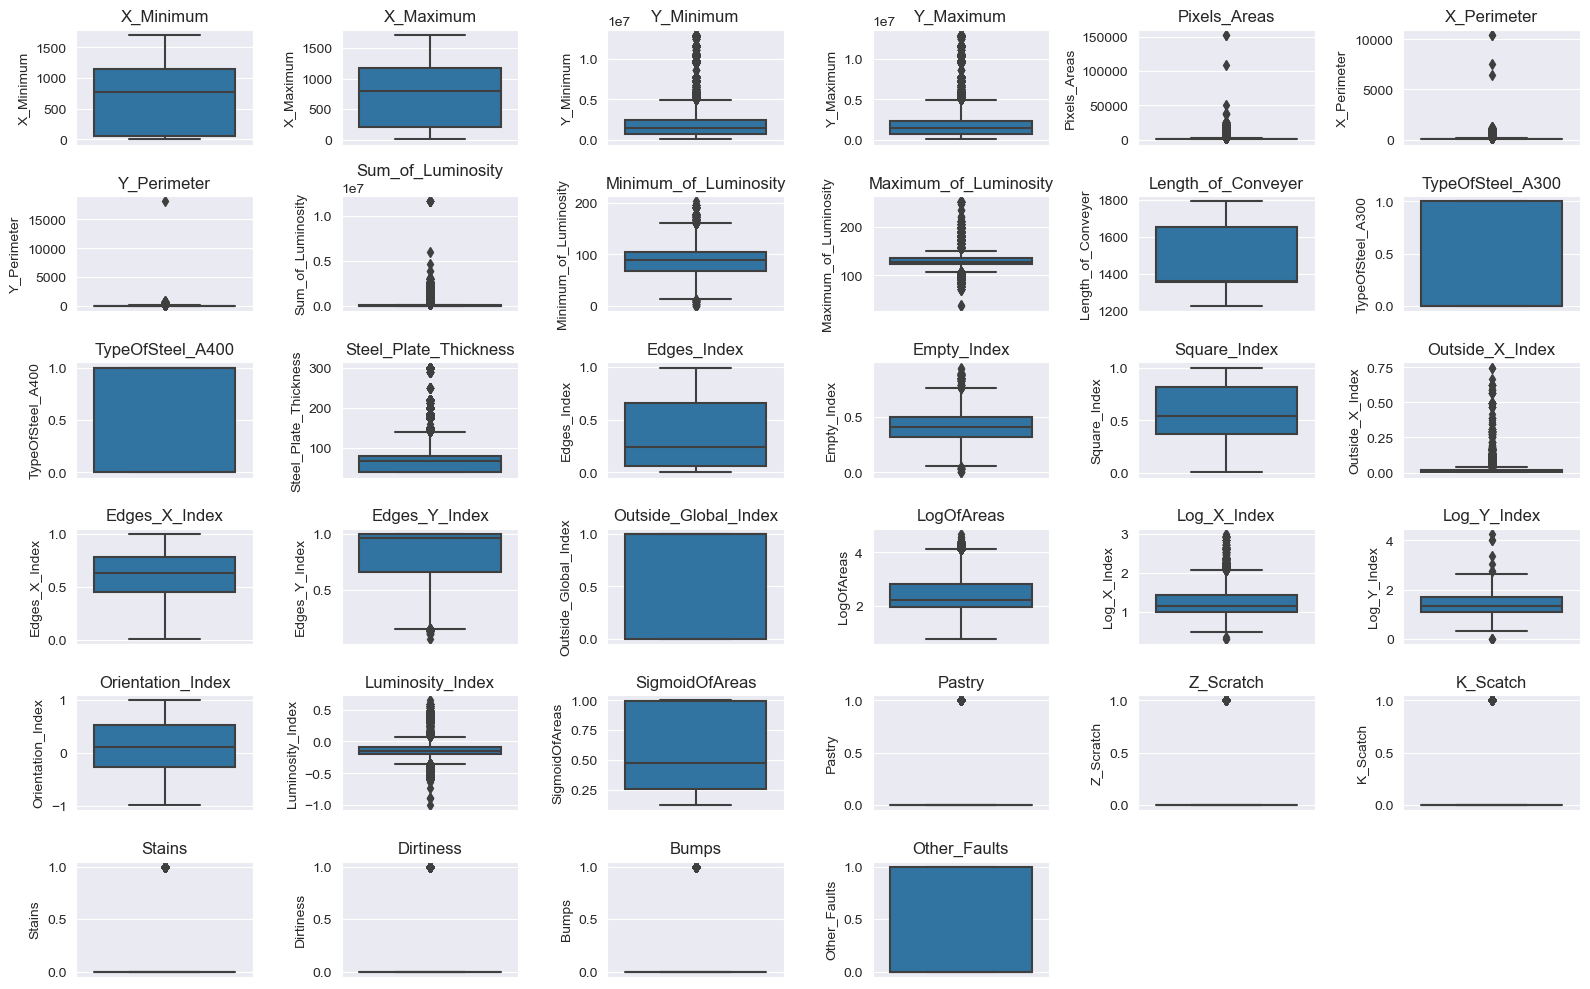

In [16]:
# Plotting the distribution of the columns

plt.figure(figsize=(16, 10))

for i, column in enumerate(total_df.drop('id',axis=1), start=1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=total_df[column])
    plt.title(column)

plt.tight_layout()
plt.show();

There are a lot of features that are spread in a wide range. These points may be criticall in creating the model

## Feature Engineering

In [41]:
total_df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [42]:
def feature_engineering(df):
    """
    This function is created to make the feature engineering process of this dataset
    """
    
    df['X_distance'] = df['X_Maximum'] - df['X_Minimum']
    df['Y_distance'] = df['Y_Maximum'] - df['Y_Minimum']
    
    df['Color_contrast'] = df['Maximum_of_Luminosity'] - df['Minimum_of_Luminosity']
    
    # Density Feature
    df['Density'] = df['Pixels_Areas'] / (df['X_Perimeter'] + df['Y_Perimeter'])
    
    return df

In [43]:
total_df = feature_engineering(total_df)

In [44]:
total_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_distance,Y_distance,Color_contrast,Density
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,5,27,1.230769
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,22,41,5.851351
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,153,68,112,10.122667
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,27,20,4.666667
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,45,29,3.748201


In [45]:
total_df.skew()

id                       -0.026137
X_Minimum                 0.016534
X_Maximum                 0.070925
Y_Minimum                 2.569569
Y_Maximum                 2.564361
Pixels_Areas              7.235676
X_Perimeter              13.910408
Y_Perimeter              64.722428
Sum_of_Luminosity         7.820306
Minimum_of_Luminosity    -0.338523
Maximum_of_Luminosity     1.246378
Length_of_Conveyer        0.847885
TypeOfSteel_A300          0.387350
TypeOfSteel_A400         -0.383154
Steel_Plate_Thickness     2.382995
Edges_Index               0.544604
Empty_Index               0.210618
Square_Index              0.017960
Outside_X_Index           3.313656
Edges_X_Index            -0.256939
Edges_Y_Index            -0.985406
Outside_Global_Index     -0.357441
LogOfAreas                0.846793
Log_X_Index               1.094516
Log_Y_Index               0.403525
Orientation_Index        -0.180955
Luminosity_Index          0.697093
SigmoidOfAreas            0.221452
Pastry              

## Training the models

### Splitting the data into train and test sets

In [46]:
# Spliting train and test df after processing

train_df = total_df[:df_train.shape[0]]
test_df = total_df[df_train.shape[0]:].dropna(axis=1)

In [47]:
# Df that will be used for train 
train_df.drop('id', axis=1,inplace=True)

train_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_distance,Y_distance,Color_contrast,Density
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,5,27,1.230769
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,22,41,5.851351
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,153,68,112,10.122667
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,27,20,4.666667
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,45,29,3.748201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,9,18,2.125000
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,12,29,5.372093
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25,74,53,3.679245
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,12,44,3.230769


In [48]:
# Train/Test splitting
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [57]:
X = train_df.drop(targets, axis = 1)

y = train_df[targets]

y_arr = y.to_numpy()

y_arr = np.argmax(y_arr, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_arr,
                                                    test_size=0.2,
                                                    random_state=42)

### Xgboost Model

In [50]:
%%time

#Performing the random search on Xgboost Model
# Define the parameter grid
param_grid = {
    
    'learning_rate': [0.00988, 0.01],# , 0.1],
    'max_depth': [4],#, 5, 6, 7],
    'subsample': [0.75, 0.8],# , 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.65],#, 0.9, 1.0],
    'reg_alpha': [0.16, 0.17],#, 0.5, 1.0],
    'reg_lambda': [0.8, 0.85, 0.75],#, 0.5, 1.0],
    'n_estimators': [900], #, 400, 600, 800, 1000],
     #'subsample_for_bin': [140000, 130000],
                   }


# Create XGBClassifier
xgb = XGBClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=3, scoring='roc_auc', cv=5, verbose=1, random_state=42)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# # Fit the model with best parameters
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 0.85, 'reg_alpha': 0.16, 'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.00988, 'colsample_bytree': 0.65}
Best accuracy found:  0.8906316290589821
Wall time: 5min 27s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.65, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.00988, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
# Get the predicted probabilities for the positive class
y_prob = best_xgb.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8903618239472276


In [55]:
import optuna

In [ ]:
 {'subsample': 0.75, 'reg_lambda': 0.75, 'reg_alpha': 0.16, 'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.00988, 'colsample_bytree': 0.6}

In [204]:
suggest_float('reg_alpha', 0.10, 0.20, log=True)

NameError: name 'suggest_float' is not defined

In [ ]:
{'subsample': 0.75, 'reg_lambda': 0.75, 'reg_alpha': 0.16, 'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.00988, 'colsample_bytree': 0.6}

In [59]:
# Define objective function
def objective(trial):
    
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbosity': 0,
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 5), 
        'learning_rate': trial.suggest_float('learning_rate', 0.009, 0.02, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9, log=True), 
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.75, log=True), 
        'reg_alpha': trial.suggest_float('reg_alpha', 0.11, 0.195, log=True), 
        'reg_lambda': trial.suggest_float('reg_lambda', 0.55, 0.95, log=True), 
        'n_estimators': trial.suggest_int('n_estimators', 880, 920) 
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test) #[:, 1]
    score = roc_auc_score(y_test, y_pred,multi_class='ovo')
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Run optimization
study.optimize(objective, n_trials=50)

# Access the best hyperparameters
best_params = study.best_params
best_score = study.best_value

print("Best score:", best_score)
print("Best parameters:", best_params)


[I 2024-03-21 12:31:30,951] A new study created in memory with name: no-name-369ac380-7061-477f-9f3c-f82fd7de7e11
[I 2024-03-21 12:31:57,106] Trial 0 finished with value: 0.9019403361254383 and parameters: {'max_depth': 4, 'learning_rate': 0.0093917466140645, 'subsample': 0.7043084326983627, 'colsample_bytree': 0.6343128613530806, 'reg_alpha': 0.14706689967092199, 'reg_lambda': 0.8101985997974709, 'n_estimators': 917}. Best is trial 0 with value: 0.9019403361254383.
[I 2024-03-21 12:32:23,129] Trial 1 finished with value: 0.9023095592263899 and parameters: {'max_depth': 4, 'learning_rate': 0.009448558509071581, 'subsample': 0.6341135525508539, 'colsample_bytree': 0.5246733053533057, 'reg_alpha': 0.18118455137401857, 'reg_lambda': 0.8324344080131928, 'n_estimators': 893}. Best is trial 1 with value: 0.9023095592263899.
[I 2024-03-21 12:32:54,342] Trial 2 finished with value: 0.9016346767733303 and parameters: {'max_depth': 5, 'learning_rate': 0.011222179582773585, 'subsample': 0.8417758

Best score: 0.9033385776028192
Best parameters: {'max_depth': 3, 'learning_rate': 0.019874252999742863, 'subsample': 0.6258854813290546, 'colsample_bytree': 0.41575337410084723, 'reg_alpha': 0.11924601014780238, 'reg_lambda': 0.646131449449583, 'n_estimators': 891}


In [60]:
xgb1 = XGBClassifier(**best_params)

xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.41575337410084723, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.019874252999742863,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=891, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
# Get the predicted probabilities for the positive class
y_prob = xgb1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("ROC-AUC-OVO Score:", roc_auc_ovo)
print("ROC-AUC-OVR Score:", roc_auc_ovr)

ROC-AUC-OVO Score: 0.9033385776028192
ROC-AUC-OVR Score: 0.8922725249432014


In [217]:
# Get the predicted probabilities for the positive class
y_prob = xgb1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8906097029269312


In [77]:
y

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
19214,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19215,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19216,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19217,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, 
                            y_pred=np.argmax(y_prob, axis=1), 
                            target_names=targets))

              precision    recall  f1-score   support

      Pastry       0.41      0.18      0.25       283
   Z_Scratch       0.64      0.65      0.65       247
    K_Scatch       0.90      0.89      0.90       700
      Stains       0.70      0.87      0.78       124
   Dirtiness       0.58      0.22      0.32        86
       Bumps       0.57      0.49      0.52       985
Other_Faults       0.48      0.61      0.54      1256

    accuracy                           0.60      3681
   macro avg       0.61      0.56      0.57      3681
weighted avg       0.60      0.60      0.59      3681



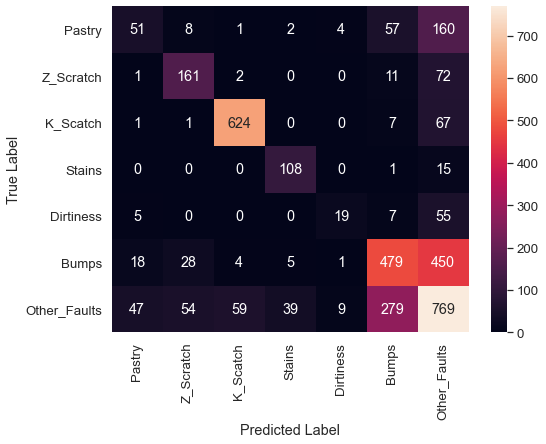

In [82]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, 
                               y_pred=np.argmax(y_prob, axis=1))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d'
            , 
            xticklabels=targets, yticklabels=targets)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
test_df = test_df.drop('id', axis=1)

In [63]:
test_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_distance,Y_distance,Color_contrast,Density
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,18,24,60,9.550725
1,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,14,13,40,6.851852
2,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,14,9,33,4.250000
3,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,10,25,33,3.809524
4,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,33,14,31,4.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,15,49,24,4.536232
12810,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,17,48,28,2.185185
12811,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,169,-344,119,12.582701
12812,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,11,30,58,5.012987


In [64]:
test_ids = df_test['id']

In [65]:
test_prediction = xgb1.predict_proba(test_df)
X_test_prediction = pd.DataFrame(test_prediction, columns = y.keys())
submission = pd.concat([test_ids, X_test_prediction],axis = 1)
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.543664,0.001416,0.001816,0.000088,0.017533,0.129278,0.306205
1,19220,0.202704,0.022605,0.012318,0.000249,0.251415,0.150399,0.360309
2,19221,0.003231,0.041553,0.037605,0.000650,0.011773,0.390268,0.514919
3,19222,0.180020,0.002132,0.000969,0.002618,0.012764,0.330221,0.471276
4,19223,0.002428,0.001630,0.001164,0.002793,0.007387,0.652910,0.331688
...,...,...,...,...,...,...,...,...
12809,32028,0.057691,0.133698,0.004652,0.000187,0.039499,0.245876,0.518397
12810,32029,0.180676,0.007562,0.026251,0.008162,0.134562,0.224127,0.418660
12811,32030,0.000307,0.000458,0.964576,0.000076,0.000643,0.000828,0.033113
12812,32031,0.411013,0.009704,0.025420,0.000134,0.083934,0.138725,0.331070


In [66]:
submission.to_csv('submission.csv', index=False)

## LightGBM

    param = {
        "objective": "multiclass",
        #"metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
        "learning_rate": trial.suggest_float("learning_rate", 0.009, 0.015),
        "n_estimators": trial.suggest_int("n_estimators", 850, 920),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.025),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 4, 7),
        "num_leaves": trial.suggest_int("num_leaves", 25, 60),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
    }

In [83]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "objective": "multiclass",
        #"metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
        "learning_rate": trial.suggest_float("learning_rate", 0.009, 0.02),
        "n_estimators": trial.suggest_int("n_estimators", 900, 2000),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.055),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 4, 7),
        "num_leaves": trial.suggest_int("num_leaves", 25, 80),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 0.95),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 2, 60),
    }

    # Create an instance of LGBMClassifier with the suggested parameters
    lgbm_classifier = LGBMClassifier(**param)
    
    # Fit the classifier on the training data
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    # score = lgbm_classifier.score(X_test, y_test)
    
    y_pred_lgb = lgbm_classifier.predict_proba(X_test)
    score = roc_auc_score(y_test, y_pred_lgb, multi_class='ovr')
    
    print(f'SCORE: {score}')

    return score

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)


# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100) # n_trials=25

# Get the best parameters after optimization
# Access the best hyperparameters
best_params_lgb = study.best_params
best_score_lgb = study.best_value

print("Best score:", best_params_lgb)
print("Best parameters:", best_score_lgb)

[I 2024-03-21 13:19:04,199] A new study created in memory with name: no-name-3c15405a-16fb-44a4-9791-fc1ee01c882b
[I 2024-03-21 13:19:12,322] Trial 0 finished with value: 0.8856865172625271 and parameters: {'learning_rate': 0.013119941307320988, 'n_estimators': 1946, 'lambda_l1': 0.04159969709057025, 'lambda_l2': 0.04394633936788146, 'max_depth': 4, 'num_leaves': 33, 'colsample_bytree': 0.2435627091261496, 'subsample': 0.8929409166199482, 'min_child_samples': 37}. Best is trial 0 with value: 0.8856865172625271.


SCORE: 0.8856865172625271


[I 2024-03-21 13:19:18,086] Trial 1 finished with value: 0.8876920698861956 and parameters: {'learning_rate': 0.0167887983557565, 'n_estimators': 922, 'lambda_l1': 0.053495492608099715, 'lambda_l2': 0.05329770563201687, 'max_depth': 4, 'num_leaves': 35, 'colsample_bytree': 0.3375533823900754, 'subsample': 0.4433937943676302, 'min_child_samples': 32}. Best is trial 1 with value: 0.8876920698861956.


SCORE: 0.8876920698861956


[I 2024-03-21 13:19:30,818] Trial 2 finished with value: 0.8842896129256452 and parameters: {'learning_rate': 0.013751395205063273, 'n_estimators': 1220, 'lambda_l1': 0.03559264473611897, 'lambda_l2': 0.025579754426081673, 'max_depth': 5, 'num_leaves': 45, 'colsample_bytree': 0.542052488162777, 'subsample': 0.8281407691144109, 'min_child_samples': 13}. Best is trial 1 with value: 0.8876920698861956.


SCORE: 0.8842896129256452


[I 2024-03-21 13:19:45,270] Trial 3 finished with value: 0.8822923164436709 and parameters: {'learning_rate': 0.014656578822549728, 'n_estimators': 1552, 'lambda_l1': 0.007322520635999886, 'lambda_l2': 0.04430179407605753, 'max_depth': 4, 'num_leaves': 28, 'colsample_bytree': 0.91166415294, 'subsample': 0.9725056264596474, 'min_child_samples': 49}. Best is trial 1 with value: 0.8876920698861956.


SCORE: 0.8822923164436709


[I 2024-03-21 13:19:50,875] Trial 4 finished with value: 0.8897960724732975 and parameters: {'learning_rate': 0.012350751460907076, 'n_estimators': 1007, 'lambda_l1': 0.039211651325607846, 'lambda_l2': 0.03760609974958405, 'max_depth': 4, 'num_leaves': 52, 'colsample_bytree': 0.2257913908364138, 'subsample': 0.9274563216630256, 'min_child_samples': 17}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8897960724732975


[I 2024-03-21 13:20:03,242] Trial 5 finished with value: 0.8841908244016331 and parameters: {'learning_rate': 0.016287745127893802, 'n_estimators': 1243, 'lambda_l1': 0.03100340105889054, 'lambda_l2': 0.04186841117373118, 'max_depth': 4, 'num_leaves': 79, 'colsample_bytree': 0.7813496175208359, 'subsample': 0.9515991532513512, 'min_child_samples': 54}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8841908244016331


[I 2024-03-21 13:20:17,360] Trial 6 finished with value: 0.882623092593895 and parameters: {'learning_rate': 0.015576899766921937, 'n_estimators': 1914, 'lambda_l1': 0.009424625102595976, 'lambda_l2': 0.027839314496765806, 'max_depth': 4, 'num_leaves': 43, 'colsample_bytree': 0.4915079672671115, 'subsample': 0.41707922541911674, 'min_child_samples': 50}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.882623092593895


[I 2024-03-21 13:20:39,011] Trial 7 finished with value: 0.8821901143023403 and parameters: {'learning_rate': 0.012924286593629482, 'n_estimators': 1209, 'lambda_l1': 0.03213480415791242, 'lambda_l2': 0.025636968998990504, 'max_depth': 7, 'num_leaves': 29, 'colsample_bytree': 0.9401652024503879, 'subsample': 0.8177958154373259, 'min_child_samples': 13}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8821901143023403


[I 2024-03-21 13:21:05,305] Trial 8 finished with value: 0.8847266079501128 and parameters: {'learning_rate': 0.009060743288359626, 'n_estimators': 1797, 'lambda_l1': 0.04034286719238085, 'lambda_l2': 0.04916028672163949, 'max_depth': 7, 'num_leaves': 29, 'colsample_bytree': 0.46884929640820444, 'subsample': 0.2926952476201038, 'min_child_samples': 52}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8847266079501128


[I 2024-03-21 13:21:21,384] Trial 9 finished with value: 0.882369709528508 and parameters: {'learning_rate': 0.01585627939510314, 'n_estimators': 1264, 'lambda_l1': 0.008177917514301181, 'lambda_l2': 0.032439292868626485, 'max_depth': 5, 'num_leaves': 65, 'colsample_bytree': 0.6781681035164098, 'subsample': 0.9097701940610612, 'min_child_samples': 29}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.882369709528508


[I 2024-03-21 13:21:32,532] Trial 10 finished with value: 0.8851313725556151 and parameters: {'learning_rate': 0.019396501986534257, 'n_estimators': 906, 'lambda_l1': 0.020384710572513134, 'lambda_l2': 0.035118061998608105, 'max_depth': 6, 'num_leaves': 61, 'colsample_bytree': 0.21134511193503847, 'subsample': 0.6908497756032584, 'min_child_samples': 4}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8851313725556151


[I 2024-03-21 13:21:41,597] Trial 11 finished with value: 0.8889061406755603 and parameters: {'learning_rate': 0.010381082692511949, 'n_estimators': 917, 'lambda_l1': 0.05229048599868567, 'lambda_l2': 0.05687557027925864, 'max_depth': 5, 'num_leaves': 51, 'colsample_bytree': 0.34962156441266096, 'subsample': 0.5416898445066657, 'min_child_samples': 29}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8889061406755603


[I 2024-03-21 13:21:52,939] Trial 12 finished with value: 0.8882893258631709 and parameters: {'learning_rate': 0.010454292491483805, 'n_estimators': 1058, 'lambda_l1': 0.0525569187625139, 'lambda_l2': 0.05943435740037195, 'max_depth': 5, 'num_leaves': 54, 'colsample_bytree': 0.37679093980300576, 'subsample': 0.6159076302025931, 'min_child_samples': 22}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8882893258631709


[I 2024-03-21 13:22:13,705] Trial 13 finished with value: 0.8856448962582085 and parameters: {'learning_rate': 0.011144042352514996, 'n_estimators': 1466, 'lambda_l1': 0.044846192677418475, 'lambda_l2': 0.03631435327819818, 'max_depth': 6, 'num_leaves': 52, 'colsample_bytree': 0.3492140852539757, 'subsample': 0.5037113151774733, 'min_child_samples': 20}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8856448962582085


[I 2024-03-21 13:22:23,784] Trial 14 finished with value: 0.8891323208860111 and parameters: {'learning_rate': 0.011589096521810621, 'n_estimators': 1072, 'lambda_l1': 0.04770627421637065, 'lambda_l2': 0.059840679574448524, 'max_depth': 5, 'num_leaves': 68, 'colsample_bytree': 0.2558191404942901, 'subsample': 0.7052245992755386, 'min_child_samples': 42}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8891323208860111


[I 2024-03-21 13:22:36,937] Trial 15 finished with value: 0.8872087362457123 and parameters: {'learning_rate': 0.012402547965435821, 'n_estimators': 1112, 'lambda_l1': 0.023571094318538845, 'lambda_l2': 0.02043956756975085, 'max_depth': 6, 'num_leaves': 74, 'colsample_bytree': 0.25315417601471124, 'subsample': 0.7364361140839093, 'min_child_samples': 39}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8872087362457123


[I 2024-03-21 13:22:57,021] Trial 16 finished with value: 0.8848126010534335 and parameters: {'learning_rate': 0.011542864361674869, 'n_estimators': 1392, 'lambda_l1': 0.04587403747549684, 'lambda_l2': 0.04857949729794995, 'max_depth': 5, 'num_leaves': 67, 'colsample_bytree': 0.6366053536528672, 'subsample': 0.7657555828530812, 'min_child_samples': 42}. Best is trial 4 with value: 0.8897960724732975.


SCORE: 0.8848126010534335


[I 2024-03-21 13:23:06,481] Trial 17 finished with value: 0.8904418677305562 and parameters: {'learning_rate': 0.009186089722251545, 'n_estimators': 1032, 'lambda_l1': 0.037660878716434296, 'lambda_l2': 0.03807341107718283, 'max_depth': 4, 'num_leaves': 60, 'colsample_bytree': 0.4335820741477119, 'subsample': 0.6589515740044738, 'min_child_samples': 59}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8904418677305562


[I 2024-03-21 13:23:21,505] Trial 18 finished with value: 0.8884262723720545 and parameters: {'learning_rate': 0.009124704872384752, 'n_estimators': 1635, 'lambda_l1': 0.023849798538318933, 'lambda_l2': 0.038399448354980735, 'max_depth': 4, 'num_leaves': 58, 'colsample_bytree': 0.40929548040386887, 'subsample': 0.27213924235794223, 'min_child_samples': 59}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8884262723720545


[I 2024-03-21 13:23:35,095] Trial 19 finished with value: 0.8836896497802945 and parameters: {'learning_rate': 0.017772476354910048, 'n_estimators': 1372, 'lambda_l1': 0.03866733523272176, 'lambda_l2': 0.030977883668248017, 'max_depth': 4, 'num_leaves': 43, 'colsample_bytree': 0.6069329904095274, 'subsample': 0.6056511888325716, 'min_child_samples': 4}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8836896497802945


[I 2024-03-21 13:23:45,816] Trial 20 finished with value: 0.8884215107793937 and parameters: {'learning_rate': 0.00994847586569131, 'n_estimators': 1036, 'lambda_l1': 0.027561461155295522, 'lambda_l2': 0.03987085031705319, 'max_depth': 4, 'num_leaves': 48, 'colsample_bytree': 0.723572480004051, 'subsample': 0.2092967693020426, 'min_child_samples': 20}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8884215107793937


[I 2024-03-21 13:23:55,801] Trial 21 finished with value: 0.8884127741525666 and parameters: {'learning_rate': 0.011738392621527627, 'n_estimators': 1111, 'lambda_l1': 0.046830331004268616, 'lambda_l2': 0.048694025271251974, 'max_depth': 5, 'num_leaves': 69, 'colsample_bytree': 0.267507211909913, 'subsample': 0.6743418888196556, 'min_child_samples': 43}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8884127741525666


[I 2024-03-21 13:24:06,431] Trial 22 finished with value: 0.887268317756741 and parameters: {'learning_rate': 0.013914511023580935, 'n_estimators': 1024, 'lambda_l1': 0.037374022003887016, 'lambda_l2': 0.03513602332253489, 'max_depth': 5, 'num_leaves': 60, 'colsample_bytree': 0.43762640844321743, 'subsample': 0.8063385892592178, 'min_child_samples': 59}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.887268317756741


[I 2024-03-21 13:24:16,968] Trial 23 finished with value: 0.8886555855545862 and parameters: {'learning_rate': 0.012097084795677022, 'n_estimators': 1151, 'lambda_l1': 0.04847593407006219, 'lambda_l2': 0.04493145697881308, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.3072940325663661, 'subsample': 0.6752730406601041, 'min_child_samples': 46}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8886555855545862


[I 2024-03-21 13:24:28,737] Trial 24 finished with value: 0.888753937140958 and parameters: {'learning_rate': 0.010942652419404052, 'n_estimators': 990, 'lambda_l1': 0.033990569272377195, 'lambda_l2': 0.054388089318239005, 'max_depth': 6, 'num_leaves': 57, 'colsample_bytree': 0.2139808226430722, 'subsample': 0.876169654952547, 'min_child_samples': 33}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.888753937140958


[I 2024-03-21 13:24:40,744] Trial 25 finished with value: 0.888208475341652 and parameters: {'learning_rate': 0.009833359724186249, 'n_estimators': 1308, 'lambda_l1': 0.042796883796258824, 'lambda_l2': 0.03097899230965743, 'max_depth': 5, 'num_leaves': 62, 'colsample_bytree': 0.28909994603315853, 'subsample': 0.5356475080462905, 'min_child_samples': 24}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.888208475341652


[I 2024-03-21 13:24:51,382] Trial 26 finished with value: 0.8872188946189397 and parameters: {'learning_rate': 0.012874898315038916, 'n_estimators': 1144, 'lambda_l1': 0.04867714716402813, 'lambda_l2': 0.03939275602754167, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.5243696231203999, 'subsample': 0.7440805359371533, 'min_child_samples': 14}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8872188946189397


[I 2024-03-21 13:24:59,488] Trial 27 finished with value: 0.8873810641437762 and parameters: {'learning_rate': 0.014880880884126067, 'n_estimators': 991, 'lambda_l1': 0.015330840654917091, 'lambda_l2': 0.05116131329133694, 'max_depth': 4, 'num_leaves': 64, 'colsample_bytree': 0.41090148955524375, 'subsample': 0.6442981455785989, 'min_child_samples': 9}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8873810641437762


[I 2024-03-21 13:25:09,921] Trial 28 finished with value: 0.8893111875785022 and parameters: {'learning_rate': 0.009666385665493634, 'n_estimators': 1094, 'lambda_l1': 0.038150893107489606, 'lambda_l2': 0.04252715161220969, 'max_depth': 5, 'num_leaves': 80, 'colsample_bytree': 0.30969655543465263, 'subsample': 0.5686912576219423, 'min_child_samples': 57}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8893111875785022


[I 2024-03-21 13:25:21,132] Trial 29 finished with value: 0.889822133324185 and parameters: {'learning_rate': 0.009621008740085944, 'n_estimators': 1328, 'lambda_l1': 0.04003847238826511, 'lambda_l2': 0.0423952018805484, 'max_depth': 4, 'num_leaves': 38, 'colsample_bytree': 0.30253035609371376, 'subsample': 0.38355423440565406, 'min_child_samples': 55}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.889822133324185


[I 2024-03-21 13:25:32,583] Trial 30 finished with value: 0.8891126831234601 and parameters: {'learning_rate': 0.01067791603979852, 'n_estimators': 1678, 'lambda_l1': 0.02818867564915871, 'lambda_l2': 0.04595849191581005, 'max_depth': 4, 'num_leaves': 34, 'colsample_bytree': 0.20115376456237094, 'subsample': 0.36755087285072807, 'min_child_samples': 54}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8891126831234601


[I 2024-03-21 13:25:42,051] Trial 31 finished with value: 0.889745524545582 and parameters: {'learning_rate': 0.009555761208256075, 'n_estimators': 1336, 'lambda_l1': 0.041335917722332575, 'lambda_l2': 0.04231384072114241, 'max_depth': 4, 'num_leaves': 80, 'colsample_bytree': 0.3044670478554764, 'subsample': 0.47385078366612937, 'min_child_samples': 57}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.889745524545582


[I 2024-03-21 13:25:53,573] Trial 32 finished with value: 0.8891197593090859 and parameters: {'learning_rate': 0.009098844159692821, 'n_estimators': 1457, 'lambda_l1': 0.04248405357418057, 'lambda_l2': 0.03727268884977034, 'max_depth': 4, 'num_leaves': 37, 'colsample_bytree': 0.38442699819711806, 'subsample': 0.4538297732810585, 'min_child_samples': 60}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8891197593090859


[I 2024-03-21 13:26:03,890] Trial 33 finished with value: 0.8888746026168086 and parameters: {'learning_rate': 0.009898051539545335, 'n_estimators': 1353, 'lambda_l1': 0.03478460569241607, 'lambda_l2': 0.04148011012456484, 'max_depth': 4, 'num_leaves': 38, 'colsample_bytree': 0.3210525947220328, 'subsample': 0.35898177733776593, 'min_child_samples': 55}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8888746026168086


[I 2024-03-21 13:26:13,752] Trial 34 finished with value: 0.8876307444177807 and parameters: {'learning_rate': 0.013454382543406685, 'n_estimators': 1508, 'lambda_l1': 0.04074445802761741, 'lambda_l2': 0.04650290410347324, 'max_depth': 4, 'num_leaves': 45, 'colsample_bytree': 0.2716463376856933, 'subsample': 0.4727339235090558, 'min_child_samples': 49}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8876307444177807


[I 2024-03-21 13:26:25,009] Trial 35 finished with value: 0.888444474348464 and parameters: {'learning_rate': 0.010995444504381564, 'n_estimators': 1201, 'lambda_l1': 0.03685353104285014, 'lambda_l2': 0.03355623635980687, 'max_depth': 4, 'num_leaves': 40, 'colsample_bytree': 0.45205497351643886, 'subsample': 0.37293199951951195, 'min_child_samples': 36}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.888444474348464


[I 2024-03-21 13:26:37,394] Trial 36 finished with value: 0.888541619082141 and parameters: {'learning_rate': 0.009610352858850363, 'n_estimators': 1312, 'lambda_l1': 0.043407872168625974, 'lambda_l2': 0.042864820606990955, 'max_depth': 4, 'num_leaves': 48, 'colsample_bytree': 0.5351039632219265, 'subsample': 0.4071392630378706, 'min_child_samples': 46}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.888541619082141


[I 2024-03-21 13:26:49,667] Trial 37 finished with value: 0.8881915292557709 and parameters: {'learning_rate': 0.01020318084468785, 'n_estimators': 1624, 'lambda_l1': 0.031506845451116504, 'lambda_l2': 0.041032525978525254, 'max_depth': 4, 'num_leaves': 76, 'colsample_bytree': 0.3640030000558862, 'subsample': 0.9854832505171056, 'min_child_samples': 52}. Best is trial 17 with value: 0.8904418677305562.


SCORE: 0.8881915292557709


[I 2024-03-21 13:26:56,170] Trial 38 finished with value: 0.8906253265273214 and parameters: {'learning_rate': 0.012363522513849, 'n_estimators': 956, 'lambda_l1': 0.03393741677246366, 'lambda_l2': 0.037894350570881724, 'max_depth': 4, 'num_leaves': 32, 'colsample_bytree': 0.23600118699742095, 'subsample': 0.2902396683498882, 'min_child_samples': 56}. Best is trial 38 with value: 0.8906253265273214.


SCORE: 0.8906253265273214


[I 2024-03-21 13:27:02,454] Trial 39 finished with value: 0.8894906322968757 and parameters: {'learning_rate': 0.014095635990313835, 'n_estimators': 956, 'lambda_l1': 0.03365277171485578, 'lambda_l2': 0.027630274773425962, 'max_depth': 4, 'num_leaves': 27, 'colsample_bytree': 0.23809427667412872, 'subsample': 0.3005513603507728, 'min_child_samples': 49}. Best is trial 38 with value: 0.8906253265273214.


SCORE: 0.8894906322968757


[I 2024-03-21 13:27:12,736] Trial 40 finished with value: 0.8876548751943131 and parameters: {'learning_rate': 0.01250002418268218, 'n_estimators': 1184, 'lambda_l1': 0.029231645495040037, 'lambda_l2': 0.03852820319775317, 'max_depth': 4, 'num_leaves': 31, 'colsample_bytree': 0.5102208688252077, 'subsample': 0.22623690409700153, 'min_child_samples': 52}. Best is trial 38 with value: 0.8906253265273214.


SCORE: 0.8876548751943131


[I 2024-03-21 13:27:21,399] Trial 41 finished with value: 0.8870048679527487 and parameters: {'learning_rate': 0.015206024363539036, 'n_estimators': 1269, 'lambda_l1': 0.039934821994677704, 'lambda_l2': 0.0438868525191945, 'max_depth': 4, 'num_leaves': 34, 'colsample_bytree': 0.2984949598092344, 'subsample': 0.31714499128699103, 'min_child_samples': 57}. Best is trial 38 with value: 0.8906253265273214.


SCORE: 0.8870048679527487


[I 2024-03-21 13:27:28,703] Trial 42 finished with value: 0.8912972220786933 and parameters: {'learning_rate': 0.009393561009998748, 'n_estimators': 947, 'lambda_l1': 0.03531541215903129, 'lambda_l2': 0.036459727963483124, 'max_depth': 4, 'num_leaves': 25, 'colsample_bytree': 0.22722440632168955, 'subsample': 0.42681922108196535, 'min_child_samples': 57}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8912972220786933


[I 2024-03-21 13:27:35,133] Trial 43 finished with value: 0.8890605526139502 and parameters: {'learning_rate': 0.01736194498059495, 'n_estimators': 960, 'lambda_l1': 0.0357660607286734, 'lambda_l2': 0.03384929576650842, 'max_depth': 4, 'num_leaves': 26, 'colsample_bytree': 0.2318487606295027, 'subsample': 0.2506877400643568, 'min_child_samples': 55}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8890605526139502


[I 2024-03-21 13:27:45,923] Trial 44 finished with value: 0.8873583060217424 and parameters: {'learning_rate': 0.013434940145309595, 'n_estimators': 904, 'lambda_l1': 0.03278707796708703, 'lambda_l2': 0.03675443347893828, 'max_depth': 4, 'num_leaves': 30, 'colsample_bytree': 0.8451791595874976, 'subsample': 0.42317734224636533, 'min_child_samples': 46}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8873583060217424


[I 2024-03-21 13:27:56,158] Trial 45 finished with value: 0.8904904926873136 and parameters: {'learning_rate': 0.0091143106617979, 'n_estimators': 1011, 'lambda_l1': 0.02605465589139683, 'lambda_l2': 0.032049045933235334, 'max_depth': 7, 'num_leaves': 26, 'colsample_bytree': 0.20380023459090066, 'subsample': 0.32921047407494325, 'min_child_samples': 16}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8904904926873136


[I 2024-03-21 13:28:06,668] Trial 46 finished with value: 0.8900567672671317 and parameters: {'learning_rate': 0.009131719957567083, 'n_estimators': 964, 'lambda_l1': 0.025463438898316766, 'lambda_l2': 0.029547804661279736, 'max_depth': 7, 'num_leaves': 32, 'colsample_bytree': 0.20484581922352782, 'subsample': 0.34431949744468066, 'min_child_samples': 8}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8900567672671317


[I 2024-03-21 13:28:16,532] Trial 47 finished with value: 0.8894465893903797 and parameters: {'learning_rate': 0.009232270238103654, 'n_estimators': 960, 'lambda_l1': 0.026188744485271837, 'lambda_l2': 0.02896556687308361, 'max_depth': 7, 'num_leaves': 25, 'colsample_bytree': 0.24154470064238953, 'subsample': 0.3309080632296096, 'min_child_samples': 10}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8894465893903797


[I 2024-03-21 13:28:35,771] Trial 48 finished with value: 0.8860749692351477 and parameters: {'learning_rate': 0.010598116480763722, 'n_estimators': 1040, 'lambda_l1': 0.01660255799460738, 'lambda_l2': 0.021864587669019133, 'max_depth': 7, 'num_leaves': 32, 'colsample_bytree': 0.5655856413645676, 'subsample': 0.33771424147624535, 'min_child_samples': 2}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8860749692351477


[I 2024-03-21 13:28:46,153] Trial 49 finished with value: 0.8896182225362056 and parameters: {'learning_rate': 0.011353387839814082, 'n_estimators': 941, 'lambda_l1': 0.020086974254898426, 'lambda_l2': 0.025359579510427086, 'max_depth': 7, 'num_leaves': 28, 'colsample_bytree': 0.20056100159256438, 'subsample': 0.2582463054669728, 'min_child_samples': 9}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8896182225362056


[I 2024-03-21 13:28:58,497] Trial 50 finished with value: 0.8877569694676267 and parameters: {'learning_rate': 0.009007481420014117, 'n_estimators': 1071, 'lambda_l1': 0.02497392111842925, 'lambda_l2': 0.03141330749284722, 'max_depth': 7, 'num_leaves': 25, 'colsample_bytree': 0.34004139346835827, 'subsample': 0.28114315243030946, 'min_child_samples': 26}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8877569694676267


[I 2024-03-21 13:29:12,495] Trial 51 finished with value: 0.8875714757181761 and parameters: {'learning_rate': 0.01020063333333016, 'n_estimators': 1002, 'lambda_l1': 0.031057656248070116, 'lambda_l2': 0.03552914839686881, 'max_depth': 7, 'num_leaves': 37, 'colsample_bytree': 0.2744487743834242, 'subsample': 0.398057696726112, 'min_child_samples': 7}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8875714757181761


[I 2024-03-21 13:29:22,941] Trial 52 finished with value: 0.8891733193535887 and parameters: {'learning_rate': 0.009446145855311904, 'n_estimators': 988, 'lambda_l1': 0.029993517938336656, 'lambda_l2': 0.029334428310863674, 'max_depth': 6, 'num_leaves': 29, 'colsample_bytree': 0.23458646857020085, 'subsample': 0.34150762223236664, 'min_child_samples': 14}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8891733193535887


[I 2024-03-21 13:29:44,779] Trial 53 finished with value: 0.8848202555488284 and parameters: {'learning_rate': 0.010204584159877454, 'n_estimators': 1949, 'lambda_l1': 0.02197819223907055, 'lambda_l2': 0.033378932525616294, 'max_depth': 6, 'num_leaves': 32, 'colsample_bytree': 0.2596547423617985, 'subsample': 0.38795522034418606, 'min_child_samples': 16}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8848202555488284


[I 2024-03-21 13:30:09,388] Trial 54 finished with value: 0.8836588905662313 and parameters: {'learning_rate': 0.010682366203256346, 'n_estimators': 1804, 'lambda_l1': 0.026394893741053065, 'lambda_l2': 0.025565918376865424, 'max_depth': 7, 'num_leaves': 39, 'colsample_bytree': 0.34126983735045224, 'subsample': 0.43053519240198423, 'min_child_samples': 51}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8836588905662313


[I 2024-03-21 13:30:20,803] Trial 55 finished with value: 0.8891432610462108 and parameters: {'learning_rate': 0.009518970335459443, 'n_estimators': 902, 'lambda_l1': 0.03554107803900545, 'lambda_l2': 0.04054493342733784, 'max_depth': 7, 'num_leaves': 41, 'colsample_bytree': 0.219800648196256, 'subsample': 0.30947277604417595, 'min_child_samples': 60}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8891432610462108


[I 2024-03-21 13:30:37,066] Trial 56 finished with value: 0.8863608516918395 and parameters: {'learning_rate': 0.010025815389347381, 'n_estimators': 1147, 'lambda_l1': 0.017669518454567337, 'lambda_l2': 0.03257722084934814, 'max_depth': 6, 'num_leaves': 35, 'colsample_bytree': 0.4825346263879128, 'subsample': 0.501822251403453, 'min_child_samples': 18}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8863608516918395


[I 2024-03-21 13:30:50,359] Trial 57 finished with value: 0.8868028394170063 and parameters: {'learning_rate': 0.011873696010135777, 'n_estimators': 1044, 'lambda_l1': 0.029063451271588762, 'lambda_l2': 0.03762691398224755, 'max_depth': 7, 'num_leaves': 28, 'colsample_bytree': 0.39218051648952423, 'subsample': 0.222297104124472, 'min_child_samples': 57}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8868028394170063


[I 2024-03-21 13:31:05,037] Trial 58 finished with value: 0.8885180088723535 and parameters: {'learning_rate': 0.009314335349034022, 'n_estimators': 1240, 'lambda_l1': 0.036949521378094596, 'lambda_l2': 0.035263297341645225, 'max_depth': 5, 'num_leaves': 36, 'colsample_bytree': 0.2803054000317138, 'subsample': 0.6383704503050224, 'min_child_samples': 6}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8885180088723535


[I 2024-03-21 13:31:16,778] Trial 59 finished with value: 0.8890608407825796 and parameters: {'learning_rate': 0.011204809500805716, 'n_estimators': 1099, 'lambda_l1': 0.03203880158187949, 'lambda_l2': 0.03897849251210294, 'max_depth': 6, 'num_leaves': 56, 'colsample_bytree': 0.20086942942071345, 'subsample': 0.5366023226331881, 'min_child_samples': 54}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8890608407825796


[I 2024-03-21 13:31:26,881] Trial 60 finished with value: 0.8896255624058226 and parameters: {'learning_rate': 0.00901671007317467, 'n_estimators': 944, 'lambda_l1': 0.02191753389258136, 'lambda_l2': 0.02682958777739578, 'max_depth': 5, 'num_leaves': 30, 'colsample_bytree': 0.32032293090868397, 'subsample': 0.2857216237501729, 'min_child_samples': 11}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8896255624058226


[I 2024-03-21 13:31:33,915] Trial 61 finished with value: 0.8875575449356361 and parameters: {'learning_rate': 0.019067117057326933, 'n_estimators': 1020, 'lambda_l1': 0.0398287835276256, 'lambda_l2': 0.029471890995495093, 'max_depth': 4, 'num_leaves': 54, 'colsample_bytree': 0.24988533936074162, 'subsample': 0.9066172033339641, 'min_child_samples': 28}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8875575449356361


[I 2024-03-21 13:31:42,019] Trial 62 finished with value: 0.88801793448051 and parameters: {'learning_rate': 0.016057823502240255, 'n_estimators': 1066, 'lambda_l1': 0.04442425965064816, 'lambda_l2': 0.03430729801354356, 'max_depth': 4, 'num_leaves': 50, 'colsample_bytree': 0.2324586722544784, 'subsample': 0.8489586171891118, 'min_child_samples': 21}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.88801793448051


[I 2024-03-21 13:31:52,448] Trial 63 finished with value: 0.8860269599780727 and parameters: {'learning_rate': 0.014459940245743694, 'n_estimators': 1402, 'lambda_l1': 0.03906037436796174, 'lambda_l2': 0.03621029572392424, 'max_depth': 4, 'num_leaves': 32, 'colsample_bytree': 0.2801129733903535, 'subsample': 0.2465997900444402, 'min_child_samples': 17}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8860269599780727


[I 2024-03-21 13:31:59,605] Trial 64 finished with value: 0.8895433914483376 and parameters: {'learning_rate': 0.012474124419658297, 'n_estimators': 988, 'lambda_l1': 0.03466138194780302, 'lambda_l2': 0.032055656260124125, 'max_depth': 4, 'num_leaves': 27, 'colsample_bytree': 0.2508774451552218, 'subsample': 0.9375198911690472, 'min_child_samples': 23}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8895433914483376


[I 2024-03-21 13:32:13,906] Trial 65 finished with value: 0.8872925880829199 and parameters: {'learning_rate': 0.009802827378218746, 'n_estimators': 1999, 'lambda_l1': 0.027151261034987533, 'lambda_l2': 0.0398345852695967, 'max_depth': 4, 'num_leaves': 59, 'colsample_bytree': 0.2205732445558016, 'subsample': 0.4520694732578941, 'min_child_samples': 35}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8872925880829199


[I 2024-03-21 13:32:23,667] Trial 66 finished with value: 0.8884079286241958 and parameters: {'learning_rate': 0.010510471156427687, 'n_estimators': 935, 'lambda_l1': 0.03776362868691204, 'lambda_l2': 0.02353414195199316, 'max_depth': 5, 'num_leaves': 63, 'colsample_bytree': 0.3609247403735457, 'subsample': 0.5731705597378636, 'min_child_samples': 12}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8884079286241958


[I 2024-03-21 13:32:32,877] Trial 67 finished with value: 0.8890334505243173 and parameters: {'learning_rate': 0.010900717727454571, 'n_estimators': 1131, 'lambda_l1': 0.03308590572754377, 'lambda_l2': 0.030650265722890882, 'max_depth': 4, 'num_leaves': 43, 'colsample_bytree': 0.4130579631839787, 'subsample': 0.35589328270039156, 'min_child_samples': 40}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8890334505243173


[I 2024-03-21 13:32:41,534] Trial 68 finished with value: 0.8887519196522372 and parameters: {'learning_rate': 0.012836594646149493, 'n_estimators': 1169, 'lambda_l1': 0.02401539774226065, 'lambda_l2': 0.03761460104706571, 'max_depth': 4, 'num_leaves': 33, 'colsample_bytree': 0.3232022198103321, 'subsample': 0.2028524458518452, 'min_child_samples': 58}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8887519196522372


[I 2024-03-21 13:32:52,249] Trial 69 finished with value: 0.8888841167966035 and parameters: {'learning_rate': 0.012049776527540624, 'n_estimators': 1088, 'lambda_l1': 0.04226890725874276, 'lambda_l2': 0.04475872602395875, 'max_depth': 5, 'num_leaves': 25, 'colsample_bytree': 0.2612515806069723, 'subsample': 0.7837603338043522, 'min_child_samples': 56}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8888841167966035


[I 2024-03-21 13:33:04,239] Trial 70 finished with value: 0.8884740612724359 and parameters: {'learning_rate': 0.009813266292077702, 'n_estimators': 1009, 'lambda_l1': 0.012120436483267383, 'lambda_l2': 0.04682712872425922, 'max_depth': 7, 'num_leaves': 30, 'colsample_bytree': 0.29176724425741163, 'subsample': 0.4928008712645977, 'min_child_samples': 53}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8884740612724359


[I 2024-03-21 13:33:14,008] Trial 71 finished with value: 0.8900385391266895 and parameters: {'learning_rate': 0.00941539952162553, 'n_estimators': 1322, 'lambda_l1': 0.04960798430529082, 'lambda_l2': 0.04317238951463897, 'max_depth': 4, 'num_leaves': 71, 'colsample_bytree': 0.2944580423330579, 'subsample': 0.37789167153110653, 'min_child_samples': 59}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8900385391266895


[I 2024-03-21 13:33:31,295] Trial 72 finished with value: 0.8874152820792421 and parameters: {'learning_rate': 0.009395012543772055, 'n_estimators': 1432, 'lambda_l1': 0.04739314844397374, 'lambda_l2': 0.04302172724984044, 'max_depth': 4, 'num_leaves': 71, 'colsample_bytree': 0.6814956818389876, 'subsample': 0.3810462247742161, 'min_child_samples': 60}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8874152820792421


[I 2024-03-21 13:33:39,614] Trial 73 finished with value: 0.8908339682083936 and parameters: {'learning_rate': 0.01032392914899175, 'n_estimators': 1046, 'lambda_l1': 0.05348393944444163, 'lambda_l2': 0.040386721893096, 'max_depth': 4, 'num_leaves': 77, 'colsample_bytree': 0.2203656248499857, 'subsample': 0.4072812813755709, 'min_child_samples': 50}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8908339682083936


[I 2024-03-21 13:33:50,554] Trial 74 finished with value: 0.8900674024340338 and parameters: {'learning_rate': 0.01029527389554251, 'n_estimators': 1273, 'lambda_l1': 0.05054230331334989, 'lambda_l2': 0.0401569552516259, 'max_depth': 4, 'num_leaves': 76, 'colsample_bytree': 0.21818356995443577, 'subsample': 0.3215959043596256, 'min_child_samples': 48}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8900674024340338


[I 2024-03-21 13:34:00,147] Trial 75 finished with value: 0.8898890301311498 and parameters: {'learning_rate': 0.01017292094538624, 'n_estimators': 1259, 'lambda_l1': 0.045433906355374185, 'lambda_l2': 0.04037560213239237, 'max_depth': 4, 'num_leaves': 77, 'colsample_bytree': 0.21543423527923614, 'subsample': 0.31232951858138164, 'min_child_samples': 48}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8898890301311498


[I 2024-03-21 13:34:11,292] Trial 76 finished with value: 0.8898179937920278 and parameters: {'learning_rate': 0.009284648812959971, 'n_estimators': 1504, 'lambda_l1': 0.051431181500474134, 'lambda_l2': 0.03848459610828569, 'max_depth': 4, 'num_leaves': 78, 'colsample_bytree': 0.22174955758554904, 'subsample': 0.41188623621803455, 'min_child_samples': 58}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8898179937920278


[I 2024-03-21 13:34:19,411] Trial 77 finished with value: 0.890255078233324 and parameters: {'learning_rate': 0.01151310042436175, 'n_estimators': 972, 'lambda_l1': 0.05162710939056679, 'lambda_l2': 0.03657096245173951, 'max_depth': 4, 'num_leaves': 66, 'colsample_bytree': 0.25285320795830135, 'subsample': 0.715250105730227, 'min_child_samples': 51}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.890255078233324


[I 2024-03-21 13:34:26,809] Trial 78 finished with value: 0.8906297599786293 and parameters: {'learning_rate': 0.010497804314750702, 'n_estimators': 923, 'lambda_l1': 0.05433159559593864, 'lambda_l2': 0.03622125528810028, 'max_depth': 4, 'num_leaves': 75, 'colsample_bytree': 0.25601841453538726, 'subsample': 0.7139314405194485, 'min_child_samples': 43}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8906297599786293


[I 2024-03-21 13:34:33,199] Trial 79 finished with value: 0.8905828641746839 and parameters: {'learning_rate': 0.010968196245603083, 'n_estimators': 924, 'lambda_l1': 0.054270388631532475, 'lambda_l2': 0.03612988794352677, 'max_depth': 4, 'num_leaves': 75, 'colsample_bytree': 0.2659502268704574, 'subsample': 0.7064013197083631, 'min_child_samples': 44}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8905828641746839


[I 2024-03-21 13:34:41,240] Trial 80 finished with value: 0.8904781046486809 and parameters: {'learning_rate': 0.011700901050392487, 'n_estimators': 925, 'lambda_l1': 0.05423212793413958, 'lambda_l2': 0.03567403385189887, 'max_depth': 4, 'num_leaves': 66, 'colsample_bytree': 0.2634597167338107, 'subsample': 0.7054422943971517, 'min_child_samples': 43}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8904781046486809


[I 2024-03-21 13:34:48,773] Trial 81 finished with value: 0.8904519423420643 and parameters: {'learning_rate': 0.011251953334188797, 'n_estimators': 920, 'lambda_l1': 0.05431087405083424, 'lambda_l2': 0.03595285792421362, 'max_depth': 4, 'num_leaves': 67, 'colsample_bytree': 0.260462500658644, 'subsample': 0.7152265766498259, 'min_child_samples': 44}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8904519423420643


[I 2024-03-21 13:34:57,015] Trial 82 finished with value: 0.8904058616481295 and parameters: {'learning_rate': 0.011709532760876823, 'n_estimators': 921, 'lambda_l1': 0.05461308153658559, 'lambda_l2': 0.03447998372896787, 'max_depth': 4, 'num_leaves': 69, 'colsample_bytree': 0.2734286433949293, 'subsample': 0.6758477805330828, 'min_child_samples': 42}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8904058616481295


[I 2024-03-21 13:35:03,942] Trial 83 finished with value: 0.8905281568425751 and parameters: {'learning_rate': 0.010897864006001085, 'n_estimators': 901, 'lambda_l1': 0.05410617588183696, 'lambda_l2': 0.03587002766453956, 'max_depth': 4, 'num_leaves': 74, 'colsample_bytree': 0.31599315745865814, 'subsample': 0.7421379187507364, 'min_child_samples': 44}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8905281568425751


[I 2024-03-21 13:35:10,755] Trial 84 finished with value: 0.89051875750726 and parameters: {'learning_rate': 0.010952327916804009, 'n_estimators': 930, 'lambda_l1': 0.053121148476855284, 'lambda_l2': 0.036226247097870735, 'max_depth': 4, 'num_leaves': 75, 'colsample_bytree': 0.24221410229695023, 'subsample': 0.750475879266557, 'min_child_samples': 39}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.89051875750726


[I 2024-03-21 13:35:17,379] Trial 85 finished with value: 0.8902092214858291 and parameters: {'learning_rate': 0.010826090644634618, 'n_estimators': 900, 'lambda_l1': 0.05318182230581826, 'lambda_l2': 0.032489289784578324, 'max_depth': 4, 'num_leaves': 75, 'colsample_bytree': 0.31610469947565173, 'subsample': 0.7518238545854115, 'min_child_samples': 39}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8902092214858291


[I 2024-03-21 13:35:25,592] Trial 86 finished with value: 0.8908978323993801 and parameters: {'learning_rate': 0.011146592388477615, 'n_estimators': 977, 'lambda_l1': 0.054959082311695974, 'lambda_l2': 0.03451257849358651, 'max_depth': 4, 'num_leaves': 72, 'colsample_bytree': 0.2403683559750537, 'subsample': 0.804649500930933, 'min_child_samples': 44}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8908978323993801


[I 2024-03-21 13:35:33,131] Trial 87 finished with value: 0.8908351230280199 and parameters: {'learning_rate': 0.011013799825426156, 'n_estimators': 976, 'lambda_l1': 0.05255396405659, 'lambda_l2': 0.03469677705973419, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.23541923820005894, 'subsample': 0.7786256783359203, 'min_child_samples': 45}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8908351230280199


[I 2024-03-21 13:35:40,602] Trial 88 finished with value: 0.8908257192817554 and parameters: {'learning_rate': 0.011063749940898511, 'n_estimators': 975, 'lambda_l1': 0.05269955156026334, 'lambda_l2': 0.03722606269751835, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.23979028979501557, 'subsample': 0.7945860163201668, 'min_child_samples': 45}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8908257192817554


[I 2024-03-21 13:35:48,302] Trial 89 finished with value: 0.8903212619059725 and parameters: {'learning_rate': 0.011449241114172663, 'n_estimators': 965, 'lambda_l1': 0.05002955308262743, 'lambda_l2': 0.03445204944944235, 'max_depth': 4, 'num_leaves': 72, 'colsample_bytree': 0.2872377725757683, 'subsample': 0.7955549693595888, 'min_child_samples': 45}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8903212619059725


[I 2024-03-21 13:36:00,634] Trial 90 finished with value: 0.8872955167210949 and parameters: {'learning_rate': 0.012204747220491093, 'n_estimators': 1045, 'lambda_l1': 0.04874022766818066, 'lambda_l2': 0.03759488450079477, 'max_depth': 4, 'num_leaves': 79, 'colsample_bytree': 0.7715298374421435, 'subsample': 0.8361348768417673, 'min_child_samples': 41}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8872955167210949


[I 2024-03-21 13:36:07,511] Trial 91 finished with value: 0.890690706884319 and parameters: {'learning_rate': 0.01107784802970637, 'n_estimators': 983, 'lambda_l1': 0.05295514428962262, 'lambda_l2': 0.033284358822564954, 'max_depth': 4, 'num_leaves': 74, 'colsample_bytree': 0.23955971219268282, 'subsample': 0.7847846291302755, 'min_child_samples': 38}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.890690706884319


[I 2024-03-21 13:36:15,329] Trial 92 finished with value: 0.890741393790449 and parameters: {'learning_rate': 0.01110412615428771, 'n_estimators': 991, 'lambda_l1': 0.05215733581692572, 'lambda_l2': 0.03342012896135815, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.23685945808048364, 'subsample': 0.8282874989865071, 'min_child_samples': 47}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.890741393790449


[I 2024-03-21 13:36:22,370] Trial 93 finished with value: 0.8905097425605435 and parameters: {'learning_rate': 0.011189655677438848, 'n_estimators': 1020, 'lambda_l1': 0.052613956353687666, 'lambda_l2': 0.03702462642125587, 'max_depth': 4, 'num_leaves': 70, 'colsample_bytree': 0.23385086592380802, 'subsample': 0.8645524022262591, 'min_child_samples': 47}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8905097425605435


[I 2024-03-21 13:36:29,819] Trial 94 finished with value: 0.890974678185003 and parameters: {'learning_rate': 0.010480652405884252, 'n_estimators': 979, 'lambda_l1': 0.05133727676688008, 'lambda_l2': 0.03320377729798588, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.23990905898753784, 'subsample': 0.8140608843146913, 'min_child_samples': 37}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.890974678185003


[I 2024-03-21 13:36:36,504] Trial 95 finished with value: 0.8909721914189543 and parameters: {'learning_rate': 0.0104741914164931, 'n_estimators': 986, 'lambda_l1': 0.05141526297097214, 'lambda_l2': 0.033659600843851306, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.23922432835286683, 'subsample': 0.8120442269152007, 'min_child_samples': 38}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8909721914189543


[I 2024-03-21 13:36:43,469] Trial 96 finished with value: 0.8903094616186991 and parameters: {'learning_rate': 0.010599513457191184, 'n_estimators': 985, 'lambda_l1': 0.05133207615699908, 'lambda_l2': 0.0330674724778791, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.24495211595414856, 'subsample': 0.8154582728694993, 'min_child_samples': 33}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8903094616186991


[I 2024-03-21 13:36:52,337] Trial 97 finished with value: 0.8906135815641093 and parameters: {'learning_rate': 0.010488471297373562, 'n_estimators': 1068, 'lambda_l1': 0.052167787696776324, 'lambda_l2': 0.031097051905207597, 'max_depth': 4, 'num_leaves': 77, 'colsample_bytree': 0.22432614635172876, 'subsample': 0.7682982097583145, 'min_child_samples': 38}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8906135815641093


[I 2024-03-21 13:37:00,472] Trial 98 finished with value: 0.8903299363858203 and parameters: {'learning_rate': 0.01004983437503214, 'n_estimators': 1030, 'lambda_l1': 0.046729113512419984, 'lambda_l2': 0.03030243952930193, 'max_depth': 4, 'num_leaves': 71, 'colsample_bytree': 0.3295133747861933, 'subsample': 0.8260646868545023, 'min_child_samples': 35}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.8903299363858203


[I 2024-03-21 13:37:10,001] Trial 99 finished with value: 0.88974826920174 and parameters: {'learning_rate': 0.01035553346451392, 'n_estimators': 1125, 'lambda_l1': 0.04923072105356621, 'lambda_l2': 0.03376750335961958, 'max_depth': 4, 'num_leaves': 73, 'colsample_bytree': 0.2851048557830109, 'subsample': 0.8753353792068341, 'min_child_samples': 37}. Best is trial 42 with value: 0.8912972220786933.


SCORE: 0.88974826920174
Best score: {'learning_rate': 0.009393561009998748, 'n_estimators': 947, 'lambda_l1': 0.03531541215903129, 'lambda_l2': 0.036459727963483124, 'max_depth': 4, 'num_leaves': 25, 'colsample_bytree': 0.22722440632168955, 'subsample': 0.42681922108196535, 'min_child_samples': 57}
Best parameters: 0.8912972220786933


In [84]:
best_params_lgb

{'learning_rate': 0.009393561009998748,
 'n_estimators': 947,
 'lambda_l1': 0.03531541215903129,
 'lambda_l2': 0.036459727963483124,
 'max_depth': 4,
 'num_leaves': 25,
 'colsample_bytree': 0.22722440632168955,
 'subsample': 0.42681922108196535,
 'min_child_samples': 57}

In [85]:
best_params_lgb1 = {
         "objective": "multiclass",
        #"metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
    'learning_rate': 0.009393561009998748,
 'n_estimators': 947,
 'lambda_l1': 0.03531541215903129,
 'lambda_l2': 0.036459727963483124,
 'max_depth': 4,
 'num_leaves': 25,
 'colsample_bytree': 0.22722440632168955,
 'subsample': 0.42681922108196535,
 'min_child_samples': 57}

In [86]:
lgb1 = LGBMClassifier(**best_params_lgb1)

lgb1.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.22722440632168955,
               lambda_l1=0.03531541215903129, lambda_l2=0.036459727963483124,
               learning_rate=0.009393561009998748, max_depth=4,
               min_child_samples=57, n_estimators=947, num_class=7,
               num_leaves=25, objective='multiclass', random_state=42,
               subsample=0.42681922108196535, verbosity=-1)

In [87]:
# Get the predicted probabilities for the positive class
y_prob_lgb = lgb1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_ovo_lgb = roc_auc_score(y_test, y_prob_lgb, multi_class='ovo')
roc_auc_ovr_lgb = roc_auc_score(y_test, y_prob_lgb, multi_class='ovr')

print("ROC-AUC-OVO Score LGB:", roc_auc_ovo_lgb)
print("ROC-AUC-OVR Score LGB:", roc_auc_ovr_lgb)

ROC-AUC-OVO Score LGB: 0.9026314842110936
ROC-AUC-OVR Score LGB: 0.8912972220786933


## Catboost

In [88]:
import catboost
from catboost import CatBoostClassifier

In [89]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "verbose": False,
        "random_seed": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.009, 0.02),
        "iterations": trial.suggest_int("iterations", 800, 1000),
        "depth": trial.suggest_int("depth", 5, 7),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 5, 7),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.5, 1.0),
    }

    # Create an instance of LGBMClassifier with the suggested parameters
    cat_classifier = CatBoostClassifier(**param)
    
    # Fit the classifier on the training data
    cat_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    #score = lgbm_classifier.score(X_test, y_test)
    
    y_pred_cat = cat_classifier.predict_proba(X_test)
    score = roc_auc_score(y_test, y_pred_cat, multi_class='ovr')
    
    print(f'SCORE: {score}')

    return score

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)


# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=25)

# Get the best parameters after optimization
# Access the best hyperparameters
best_params_cat = study.best_params
best_score_cat = study.best_value

print("Best score:", best_score_cat)
print("Best parameters:", best_params_cat)

[I 2024-03-21 13:41:14,407] A new study created in memory with name: no-name-43fb8372-76b3-46b9-95dd-293026f5a18d
[I 2024-03-21 13:44:40,522] Trial 0 finished with value: 0.8896483033191226 and parameters: {'learning_rate': 0.013119941307320988, 'iterations': 991, 'depth': 7, 'l2_leaf_reg': 6.197316968394073, 'bagging_temperature': 0.5780093202212182}. Best is trial 0 with value: 0.8896483033191226.


SCORE: 0.8896483033191226


[I 2024-03-21 13:46:46,442] Trial 1 finished with value: 0.8886454144901255 and parameters: {'learning_rate': 0.010715939723698229, 'iterations': 811, 'depth': 7, 'l2_leaf_reg': 6.202230023486417, 'bagging_temperature': 0.8540362888980227}. Best is trial 0 with value: 0.8896483033191226.


SCORE: 0.8886454144901255


[I 2024-03-21 13:49:31,109] Trial 2 finished with value: 0.8891233954348355 and parameters: {'learning_rate': 0.009226429437253826, 'iterations': 994, 'depth': 7, 'l2_leaf_reg': 5.424678221356553, 'bagging_temperature': 0.5909124836035503}. Best is trial 0 with value: 0.8896483033191226.


SCORE: 0.8891233954348355


[I 2024-03-21 13:50:25,727] Trial 3 finished with value: 0.8887320483464246 and parameters: {'learning_rate': 0.011017449608387771, 'iterations': 861, 'depth': 6, 'l2_leaf_reg': 5.863890037284231, 'bagging_temperature': 0.645614570099021}. Best is trial 0 with value: 0.8896483033191226.


SCORE: 0.8887320483464246


[I 2024-03-21 13:50:57,735] Trial 4 finished with value: 0.890099977205978 and parameters: {'learning_rate': 0.015730381841946174, 'iterations': 828, 'depth': 5, 'l2_leaf_reg': 5.732723686587383, 'bagging_temperature': 0.728034992108518}. Best is trial 4 with value: 0.890099977205978.


SCORE: 0.890099977205978


[I 2024-03-21 13:51:44,476] Trial 5 finished with value: 0.8902804799870331 and parameters: {'learning_rate': 0.01763693557532315, 'iterations': 840, 'depth': 6, 'l2_leaf_reg': 6.184829137724085, 'bagging_temperature': 0.5232252063599989}. Best is trial 5 with value: 0.8902804799870331.


SCORE: 0.8902804799870331


[I 2024-03-21 13:52:14,784] Trial 6 finished with value: 0.8896082450244995 and parameters: {'learning_rate': 0.01568299337091582, 'iterations': 834, 'depth': 5, 'l2_leaf_reg': 6.897771074506666, 'bagging_temperature': 0.9828160165372797}. Best is trial 5 with value: 0.8902804799870331.


SCORE: 0.8896082450244995


[I 2024-03-21 13:52:45,266] Trial 7 finished with value: 0.8904668271639039 and parameters: {'learning_rate': 0.017892370829281072, 'iterations': 861, 'depth': 5, 'l2_leaf_reg': 6.368466053024314, 'bagging_temperature': 0.7200762468698007}. Best is trial 7 with value: 0.8904668271639039.


SCORE: 0.8904668271639039


[I 2024-03-21 13:53:16,951] Trial 8 finished with value: 0.888109372096672 and parameters: {'learning_rate': 0.010342420583292567, 'iterations': 899, 'depth': 5, 'l2_leaf_reg': 6.818640804157564, 'bagging_temperature': 0.6293899908000085}. Best is trial 7 with value: 0.8904668271639039.


SCORE: 0.888109372096672


[I 2024-03-21 13:53:59,387] Trial 9 finished with value: 0.8901227204087434 and parameters: {'learning_rate': 0.016287745127893802, 'iterations': 862, 'depth': 6, 'l2_leaf_reg': 6.093420558686559, 'bagging_temperature': 0.5924272277627636}. Best is trial 7 with value: 0.8904668271639039.


SCORE: 0.8901227204087434


[I 2024-03-21 13:54:30,650] Trial 10 finished with value: 0.8906283524679741 and parameters: {'learning_rate': 0.019740696815317888, 'iterations': 937, 'depth': 5, 'l2_leaf_reg': 5.03592375122964, 'bagging_temperature': 0.8200442512337782}. Best is trial 10 with value: 0.8906283524679741.


SCORE: 0.8906283524679741


[I 2024-03-21 13:55:05,026] Trial 11 finished with value: 0.890526110157874 and parameters: {'learning_rate': 0.019291266752550496, 'iterations': 943, 'depth': 5, 'l2_leaf_reg': 5.171170136815977, 'bagging_temperature': 0.8157719253037791}. Best is trial 10 with value: 0.8906283524679741.


SCORE: 0.890526110157874


[I 2024-03-21 13:55:38,099] Trial 12 finished with value: 0.8908769551108617 and parameters: {'learning_rate': 0.01991622366081434, 'iterations': 950, 'depth': 5, 'l2_leaf_reg': 5.067482335041261, 'bagging_temperature': 0.8590635156906755}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8908769551108617


[I 2024-03-21 13:56:12,150] Trial 13 finished with value: 0.8907651103573235 and parameters: {'learning_rate': 0.01966949089651057, 'iterations': 942, 'depth': 5, 'l2_leaf_reg': 5.008631061684489, 'bagging_temperature': 0.9117487850633073}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8907651103573235


[I 2024-03-21 13:57:04,412] Trial 14 finished with value: 0.8901980690548724 and parameters: {'learning_rate': 0.01829336742782557, 'iterations': 952, 'depth': 6, 'l2_leaf_reg': 5.417728310541715, 'bagging_temperature': 0.9364835986505805}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8901980690548724


[I 2024-03-21 13:57:37,181] Trial 15 finished with value: 0.8897036001444665 and parameters: {'learning_rate': 0.013541504725767328, 'iterations': 909, 'depth': 5, 'l2_leaf_reg': 5.342407796955217, 'bagging_temperature': 0.8952304162292035}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8897036001444665


[I 2024-03-21 13:58:30,823] Trial 16 finished with value: 0.8902696759245882 and parameters: {'learning_rate': 0.01999298682505707, 'iterations': 969, 'depth': 6, 'l2_leaf_reg': 5.661159335970652, 'bagging_temperature': 0.9976217998355338}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8902696759245882


[I 2024-03-21 13:59:04,931] Trial 17 finished with value: 0.8904299256299766 and parameters: {'learning_rate': 0.016719452199135232, 'iterations': 909, 'depth': 5, 'l2_leaf_reg': 5.02743075749108, 'bagging_temperature': 0.7814616387402522}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8904299256299766


[I 2024-03-21 13:59:55,288] Trial 18 finished with value: 0.8901250696371626 and parameters: {'learning_rate': 0.018417664983092812, 'iterations': 967, 'depth': 6, 'l2_leaf_reg': 5.243888763644633, 'bagging_temperature': 0.9102361265933461}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8901250696371626


[I 2024-03-21 14:00:24,558] Trial 19 finished with value: 0.8895970887494907 and parameters: {'learning_rate': 0.014338437776046627, 'iterations': 918, 'depth': 5, 'l2_leaf_reg': 5.515927475044942, 'bagging_temperature': 0.8763491845212539}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8895970887494907


[I 2024-03-21 14:01:10,068] Trial 20 finished with value: 0.8899613539202165 and parameters: {'learning_rate': 0.01890634739292417, 'iterations': 886, 'depth': 6, 'l2_leaf_reg': 5.59448097376068, 'bagging_temperature': 0.937059525396593}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8899613539202165


[I 2024-03-21 14:01:40,734] Trial 21 finished with value: 0.8906045022307145 and parameters: {'learning_rate': 0.01966827708871875, 'iterations': 933, 'depth': 5, 'l2_leaf_reg': 5.010793097637283, 'bagging_temperature': 0.8301541415580789}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8906045022307145


[I 2024-03-21 14:02:11,031] Trial 22 finished with value: 0.8904221244029433 and parameters: {'learning_rate': 0.01719567420601068, 'iterations': 927, 'depth': 5, 'l2_leaf_reg': 5.1494488202462225, 'bagging_temperature': 0.7688857830963279}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8904221244029433


[I 2024-03-21 14:02:43,243] Trial 23 finished with value: 0.8907292055203108 and parameters: {'learning_rate': 0.019028904950370167, 'iterations': 961, 'depth': 5, 'l2_leaf_reg': 5.260732161998037, 'bagging_temperature': 0.8091573460266623}. Best is trial 12 with value: 0.8908769551108617.


SCORE: 0.8907292055203108


[I 2024-03-21 14:03:14,992] Trial 24 finished with value: 0.8908912601438322 and parameters: {'learning_rate': 0.018590744312310836, 'iterations': 965, 'depth': 5, 'l2_leaf_reg': 5.286200017467146, 'bagging_temperature': 0.6884979853831892}. Best is trial 24 with value: 0.8908912601438322.


SCORE: 0.8908912601438322
Best score: 0.8908912601438322
Best parameters: {'learning_rate': 0.018590744312310836, 'iterations': 965, 'depth': 5, 'l2_leaf_reg': 5.286200017467146, 'bagging_temperature': 0.6884979853831892}


In [90]:
best_params_cat1 = {
         "verbose": False,
        "random_seed": 42,
    
    'learning_rate': 0.018590744312310836, 
    'iterations': 965, 
    'depth': 5, 
    'l2_leaf_reg': 5.286200017467146, 
    'bagging_temperature': 0.6884979853831892}

In [91]:
cat1 = CatBoostClassifier(**best_params_cat1)

cat1.fit(X_train, y_train)

In [92]:
# Get the predicted probabilities for the positive class
y_prob_cat = cat1.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_ovo_cat = roc_auc_score(y_test, y_prob_cat, multi_class='ovo')
roc_auc_ovr_cat = roc_auc_score(y_test, y_prob_cat, multi_class='ovr')

print("ROC-AUC-OVO Score CAT:", roc_auc_ovo_cat)
print("ROC-AUC-OVR Score CAT:", roc_auc_ovr_cat)

ROC-AUC-OVO Score CAT: 0.9007664288271777
ROC-AUC-OVR Score CAT: 0.8908912601438322


In [93]:
best_params

{'max_depth': 3,
 'learning_rate': 0.019874252999742863,
 'subsample': 0.6258854813290546,
 'colsample_bytree': 0.41575337410084723,
 'reg_alpha': 0.11924601014780238,
 'reg_lambda': 0.646131449449583,
 'n_estimators': 891}

In [94]:
best_params_lgb1

{'objective': 'multiclass',
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'random_state': 42,
 'num_class': 7,
 'learning_rate': 0.009393561009998748,
 'n_estimators': 947,
 'lambda_l1': 0.03531541215903129,
 'lambda_l2': 0.036459727963483124,
 'max_depth': 4,
 'num_leaves': 25,
 'colsample_bytree': 0.22722440632168955,
 'subsample': 0.42681922108196535,
 'min_child_samples': 57}

In [95]:
best_params_cat1

{'verbose': False,
 'random_seed': 42,
 'learning_rate': 0.018590744312310836,
 'iterations': 965,
 'depth': 5,
 'l2_leaf_reg': 5.286200017467146,
 'bagging_temperature': 0.6884979853831892}

In [96]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [98]:
# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the weighted ensemble
    
    obj_estimators = [
        ('LGBM', LGBMClassifier(**best_params_lgb1)),
        ('XGB', XGBClassifier(**best_params)),
        ('CAT', CatBoostClassifier(**best_params_cat1))
    ]
    
    voting_classifier = VotingClassifier(
        estimators=obj_estimators,
        voting='soft',
        weights=[
            trial.suggest_float('LGBM_Weight', 0.00, 10.00),
            trial.suggest_float('XGB_Weight', 0.00, 10.00),
            trial.suggest_float('CAT_Weight', 0.00, 10.00),
        ],
    )
    
    voting_classifier.fit(X_train, y_train)
    
    predict_probs = voting_classifier.predict_proba(X_test)
    
    auc_score = roc_auc_score(y_test, predict_probs, multi_class='ovr')

    return auc_score

# Set up the sampler for Optuna optimization
weight_sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
weight_study = optuna.create_study(direction="maximize", sampler=weight_sampler)

# Run the optimization process
weight_study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=20)

# Get the best parameters after optimization
weight_best_params = weight_study.best_params
    
print(f'BEST WEIGHTS: {weight_best_params}')

[I 2024-03-21 14:11:27,329] A new study created in memory with name: no-name-ef956afe-b031-48b0-8615-b5dcfaed7455
[I 2024-03-21 14:12:21,427] Trial 0 finished with value: 0.8927481257710566 and parameters: {'LGBM_Weight': 3.745401188473625, 'XGB_Weight': 9.50714306409916, 'CAT_Weight': 7.319939418114051}. Best is trial 0 with value: 0.8927481257710566.
[I 2024-03-21 14:13:13,435] Trial 1 finished with value: 0.89240540950002 and parameters: {'LGBM_Weight': 5.986584841970366, 'XGB_Weight': 1.5601864044243652, 'CAT_Weight': 1.5599452033620265}. Best is trial 0 with value: 0.8927481257710566.
[I 2024-03-21 14:14:09,399] Trial 2 finished with value: 0.8926618725281673 and parameters: {'LGBM_Weight': 0.5808361216819946, 'XGB_Weight': 8.661761457749352, 'CAT_Weight': 6.011150117432088}. Best is trial 0 with value: 0.8927481257710566.
[I 2024-03-21 14:15:03,882] Trial 3 finished with value: 0.892592736809054 and parameters: {'LGBM_Weight': 7.080725777960454, 'XGB_Weight': 0.20584494295802447,

BEST WEIGHTS: {'LGBM_Weight': 8.219946634454349, 'XGB_Weight': 6.6808150265778945, 'CAT_Weight': 9.918427656528218}


In [102]:
from sklearn.pipeline import Pipeline

In [99]:
obj_estimators = [
        ('LGBM', LGBMClassifier(**best_params_lgb1)),
        ('XGB', XGBClassifier(**best_params)),
        ('CAT', CatBoostClassifier(**best_params_cat1))
    ]

In [101]:
voting_classifier = VotingClassifier(
    estimators=obj_estimators,
    voting='soft',
    weights=[
        8.219946634454349,
        6.6808150265778945,
        9.918427656528218,
    ],
)

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(colsample_bytree=0.22722440632168955,
                                             lambda_l1=0.03531541215903129,
                                             lambda_l2=0.036459727963483124,
                                             learning_rate=0.009393561009998748,
                                             max_depth=4, min_child_samples=57,
                                             n_estimators=947, num_class=7,
                                             num_leaves=25,
                                             objective='multiclass',
                                             random_state=42,
                                             subsample=0.42681922108196535,
                                             verbosity=-1)),
                             ('XGB...
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=891, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('CAT',
                              <catboost.core.CatBoostClassifier object at 0x0000026587D03D60>)],
                 voting='soft',
                 weights=[8.219946634454349, 6.6808150265778945,
                          9.918427656528218])

In [103]:
# Get the predicted probabilities for the positive class
y_prob_vot = voting_classifier.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_ovo_vot = roc_auc_score(y_test, y_prob_vot, multi_class='ovo')
roc_auc_ovr_vot = roc_auc_score(y_test, y_prob_vot, multi_class='ovr')
print("ROC-AUC-VOT-OVO Score:", roc_auc_ovo_vot)
print("ROC-AUC-VOT-OVO Score:", roc_auc_ovr_vot)

ROC-AUC-VOT-OVO Score: 0.9035926853451768
ROC-AUC-VOT-OVO Score: 0.8928055443982965


In [104]:
print('Xgboost {}'.format(roc_auc_ovr))
print('LightGBM {}'.format(roc_auc_ovr_lgb))
print('Catboost {}'.format(roc_auc_ovr_cat))
print('Voting {}'.format(roc_auc_ovr_vot))

Xgboost 0.8922725249432014
LightGBM 0.8912972220786933
Catboost 0.8908912601438322
Voting 0.8928055443982965


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [105]:
from sklearn.ensemble import StackingClassifier

In [112]:
# Define the base estimators
base_estimators = [
    ('LGBM', LGBMClassifier(**best_params_lgb1)),
    ('XGB', XGBClassifier(**best_params)),
    ('CAT', CatBoostClassifier(**best_params_cat1))
]

# Initialize the stacking classifier with the base estimators and meta-estimator
stacking_classifier = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression()  # You can use any meta-estimator here, like RandomForestClassifier, etc.
)

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(colsample_bytree=0.22722440632168955,
                                               lambda_l1=0.03531541215903129,
                                               lambda_l2=0.036459727963483124,
                                               learning_rate=0.009393561009998748,
                                               max_depth=4,
                                               min_child_samples=57,
                                               n_estimators=947, num_class=7,
                                               num_leaves=25,
                                               objective='multiclass',
                                               random_state=42,
                                               subsample=0.42681922108196535,
                                               verbosity=-1)),
                               ('X...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=891, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('CAT',
                                <catboost.core.CatBoostClassifier object at 0x0000026587B55BB0>)],
                   final_estimator=LogisticRegression())

In [113]:
# Get the predicted probabilities for the positive class
y_prob_stack = stacking_classifier.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc_ovo_sta = roc_auc_score(y_test, y_prob_stack, multi_class='ovo')
roc_auc_ovr_sta = roc_auc_score(y_test, y_prob_stack, multi_class='ovr')
print("ROC-AUC-STA-OVO Score:", roc_auc_ovo_sta)
print("ROC-AUC-STA-OVR Score:", roc_auc_ovr_sta)

ROC-AUC-STA-OVO Score: 0.8921115046917654
ROC-AUC-STA-OVR Score: 0.8824974681931852


In [118]:
print('Xgboost {}'.format(roc_auc_ovr))
print('LightGBM {}'.format(roc_auc_ovr_lgb))
print('Catboost {}'.format(roc_auc_ovr_cat))
print('Voting {}'.format(roc_auc_ovr_vot))
print('Stacking {}'.format(roc_auc_ovr_sta))

Xgboost 0.8922725249432014
LightGBM 0.8912972220786933
Catboost 0.8908912601438322
Voting 0.8928055443982965
Stacking 0.8824974681931852


In [115]:
test_prediction_vot = voting_classifier.predict_proba(test_df)
test_prediction_vot = pd.DataFrame(test_prediction_vot, columns = y.keys())
submission_vot = pd.concat([test_ids, test_prediction_vot],axis = 1)
submission_vot

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.529118,0.003183,0.002331,0.000086,0.023610,0.127783,0.313889
1,19220,0.249321,0.025096,0.011697,0.000617,0.219696,0.157379,0.336194
2,19221,0.003889,0.040663,0.045203,0.001359,0.010880,0.376597,0.521408
3,19222,0.154026,0.003699,0.001097,0.002175,0.013587,0.364571,0.460845
4,19223,0.003708,0.003138,0.002310,0.002636,0.007102,0.650495,0.330612
...,...,...,...,...,...,...,...,...
12809,32028,0.072633,0.126858,0.005391,0.000324,0.041162,0.240617,0.513015
12810,32029,0.175686,0.006518,0.025474,0.014157,0.146274,0.217117,0.414775
12811,32030,0.000246,0.000504,0.956954,0.000050,0.000383,0.000939,0.040924
12812,32031,0.433560,0.008777,0.020177,0.000238,0.070630,0.135883,0.330734


In [117]:
submission_vot.to_csv('submission.csv', index = False)